## Выжившие пассажиры Титаника

Будем анализировать данные пассажиров Титаника, дабы установить, какие факторы могут повысить шансы на выживание при кораблекрушении

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

Загрузим данные пассажиров Титаника и статистику выживших




In [2]:
d1 = pd.read_csv('titanic_data.csv')
d2 = pd.read_csv('titanic_surv.csv')

Теперь соединим две таблицы в одну

In [3]:
data = pd.concat([d1, d2], axis=1)

In [4]:
data.head(5)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [5]:
data.shape


(891, 12)

In [6]:
data.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Survived         int64
dtype: object

Проверим сколько у нас данных отсутсвует и будем решать что делать с ними

In [7]:
data.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived         0
dtype: int64

Для наглядности покажем отсутствующие данные на тепловой диаграмме:

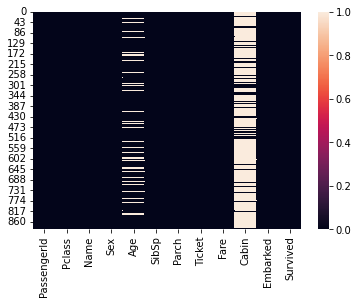

In [8]:
sns.heatmap(data.isnull())

В 'Cabin' отсутствует большое число записей. Убираем его - все равно эти данные не особо важны для нас.

In [9]:
data = data.drop(columns=['Cabin'])

Теперь, заполним пустые записи столбца 'Age' случайными значениями. Значения не абсолютно случайны - мы основываемся на существующих записях, на их основе и происходит генерация.

In [10]:
mean = data['Age'].mean()
std = data['Age'].std() 
number_of_nulls = data['Age'].isnull().sum()
random_ages = np.random.randint(mean - std, mean + std, size=number_of_nulls)

In [11]:
new_ages = data['Age'].copy()
new_ages[np.isnan(new_ages)] = random_ages
data['Age'] = new_ages

Ещё раз посчитаем количество пустых полей

In [12]:
data.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
Survived       0
dtype: int64

Снова тепловая диаграмма в помощь

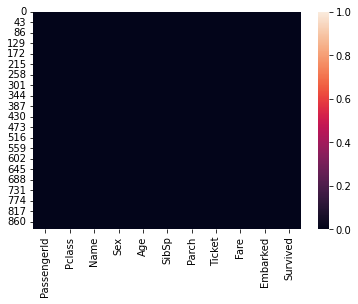

In [13]:
sns.heatmap(data.isnull())

Уже лучше - осталось лишь пара пустых полей.

Добьёмся идеала - просто дропнем эти две записи с пустым полем 'Embarked'

In [14]:
data = data[data['Embarked'].notnull()]

In [15]:

data.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Survived       0
dtype: int64

Теперь уберем признаки, которые нам не пригодятся:
- Имя
- ID
- Билет


In [16]:
data = data.drop(columns=['Name', 'PassengerId', 'Ticket'])

Мы подготовили данные для первичного анализа

Теперь попробуем выявить некоторые зависимости и  построить графики к ним


Например, проверим, насколько класс пассажира влияет на шансы выжить

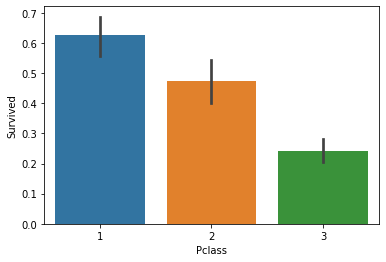

In [17]:
sns.barplot(data=data, x='Pclass', y='Survived')

Как видим, существует некоторая зависимость: У пассажиров первого класса вероятность выжить наибольшая, у пассажиров третьего класса - наименьшая.

Мы не сексисты, но проверим, влияет ли пол на шансы выжить

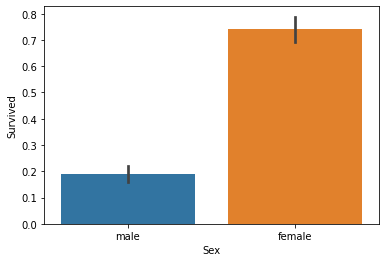

In [18]:
sns.barplot(data=data, x='Sex', y='Survived')

У женщин вероятность выжить значительно больше - прям как с вероятностью дожить до пенсионного возраста.

Проведем более глубокий анализ - добавим зависимость от возраста

Text(0.5, 1.0, 'Male')

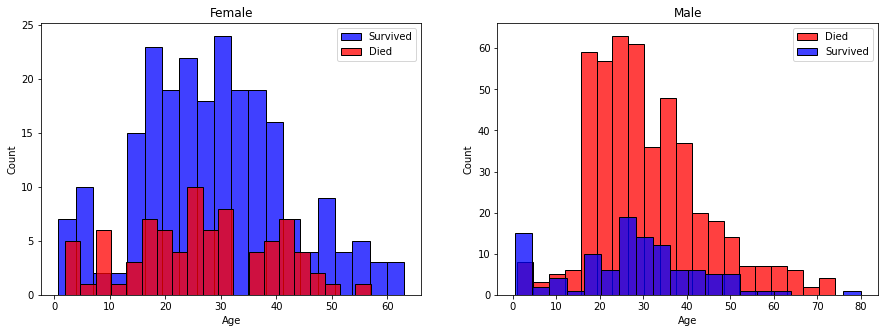

In [19]:
men = data[data['Sex']=='male']
women = data[data['Sex']=='female']

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

ax = sns.histplot(women[women['Survived']==1]['Age'], bins=20, label='Survived', ax = axes[0], color='blue')
ax = sns.histplot(women[women['Survived']==0]['Age'], bins=20, label='Died', ax = axes[0], color='red')
ax.legend()
ax.set_title('Female')

ax = sns.histplot(men[men['Survived']==0]['Age'], bins=20, label='Died', ax = axes[1], color='red')
ax = sns.histplot(men[men['Survived']==1]['Age'], bins=20, label='Survived', ax = axes[1], color='blue')
ax.legend()
ax.set_title('Male')

Мда, сначала думал,  где же я ошибку сделал - почему, женщины в большинстве выжили, а мужчины в основном как ДиКаприо...

Но нет, графики корректны.

На последок выясним, влияет ли на шансы выжить наличие родственников:

На первых двух отдельно выведем графики для 'Parch' и 'SibSp'

Третий график - для объединения'Parch' и 'SibSp' в 'Relatives'

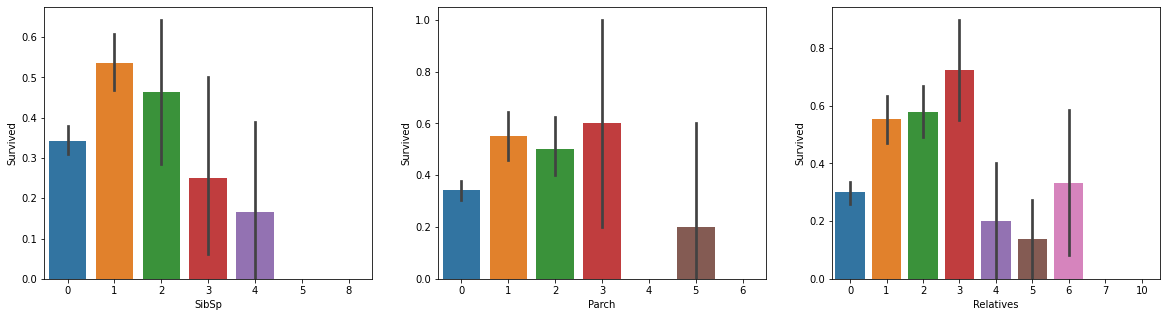

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

ax = sns.barplot(data=data, x='SibSp', y='Survived', ax=axes[0])
ax = sns.barplot(data=data, x='Parch', y='Survived', ax=axes[1])

data['Relatives'] = data['Parch'] + data['SibSp']
ax = sns.barplot(data=data, x='Relatives', y='Survived', ax=axes[2])
plt.show()

Видно, что у людей с родственниками шансы выжить выше (интересно почему). 

В целом можно заменить Parch и SibSp на Relatives, чтобы уменьшить количество признаков - как будто это выглядит логично


In [21]:
data['Relatives'] = data['Parch'] + data['SibSp']
data = data.drop(columns=['SibSp', 'Parch'])

## Итого:

Первоначальный анализ "руками" показал, что есть зависимости между определенными признаками пассажиров и их шансами выжить при кораблекрушении, а также что у исследований в данном направлении есть потенциал. 

В целом приведенных данных достаточно, чтобы на их основе строить правдоподобную статистику.